# Rubber Band Regression Analysis

## Introduction

This project investigates how rubber band length changes as weight is added. Two different rubber bands were tested; each had weights added in discrete increments, and the corresponding extension (length) of the band was measured. The goals of the analysis are:

1. **Identify curvature** in the data.  
2. **Fit appropriate models** (linear or otherwise) to capture that curvature.  
3. **Check diagnostic plots** to assess model validity (normality, homoskedasticity, outliers, etc.).  
4. **Provide confidence and prediction intervals** as part of the final model interpretation.

## Data Description

- Data was collected by incrementally adding weights to a plate suspended by a rubber band and measuring the resulting length of the band.
- **Rubber Band 1 (band1)** and **Rubber Band 2 (band2)** each contain columns for:
  - `Dice`: A numeric measure related to how many increments were added.
  - `Rubber.Band.Length`: The measured length of the band (in cm) under that increment.
- We convert `Dice` to an actual **weight** in grams using a scaling factor of 4.32 grams per increment.

### 1. Data Import and Preparation

In [3]:
# Specify file paths
band1_path <- "/Users/kajizora/Desktop/School/portfolio_projects/Transformations/Band1.csv"
band2_path <- "/Users/kajizora/Desktop/School/portfolio_projects/Transformations/Band2.csv"

# Read CSV files
band1 <- read.csv(band1_path)
band2 <- read.csv(band2_path)

# Add a weight column (in grams) to each band
band1$weight_g <- band1$Dice * 4.32
band2$weight_g <- band2$Dice * 4.32

### 2. Exploratory Data Analysis

We visualize each band’s raw data to see which band displays more curvature.

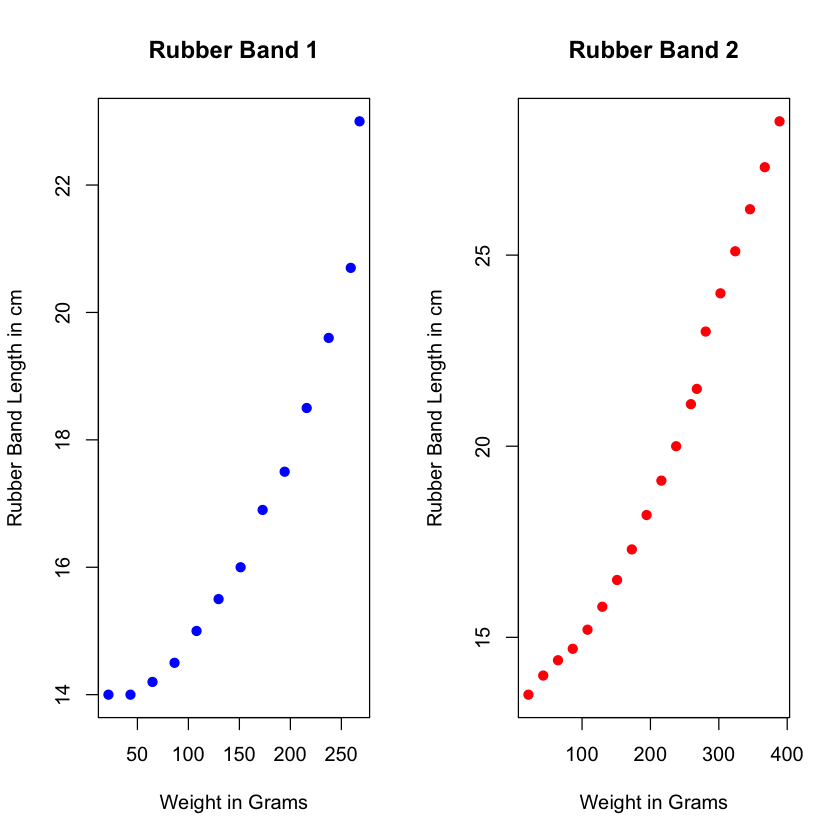

In [4]:
par(mfrow = c(1, 2))

# Plot of Rubber Band 1
plot(
  band1$weight_g, 
  band1$Rubber.Band.Length, 
  main = "Rubber Band 1", 
  xlab = "Weight in Grams", 
  ylab = "Rubber Band Length in cm", 
  pch = 19, 
  col = "blue"
)

# Plot of Rubber Band 2
plot(
  band2$weight_g, 
  band2$Rubber.Band.Length, 
  main = "Rubber Band 2", 
  xlab = "Weight in Grams", 
  ylab = "Rubber Band Length in cm", 
  pch = 19, 
  col = "red"
)

**Observation:** Rubber Band 1 shows more pronounced curvature overall; Rubber Band 2 has a small notch around 125 g but otherwise appears more linear.

### 3. Fitting a Linear Model (Band 1)

Because **Band 1** has the most curvature, we start by fitting a basic linear model:


Call:
lm(formula = Rubber.Band.Length ~ weight_g, data = band1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9096 -0.7025 -0.2884  0.2552  2.2724 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.960252   0.581958  20.552 3.99e-10 ***
weight_g     0.032733   0.003426   9.553 1.17e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9795 on 11 degrees of freedom
Multiple R-squared:  0.8924,	Adjusted R-squared:  0.8827 
F-statistic: 91.26 on 1 and 11 DF,  p-value: 1.165e-06


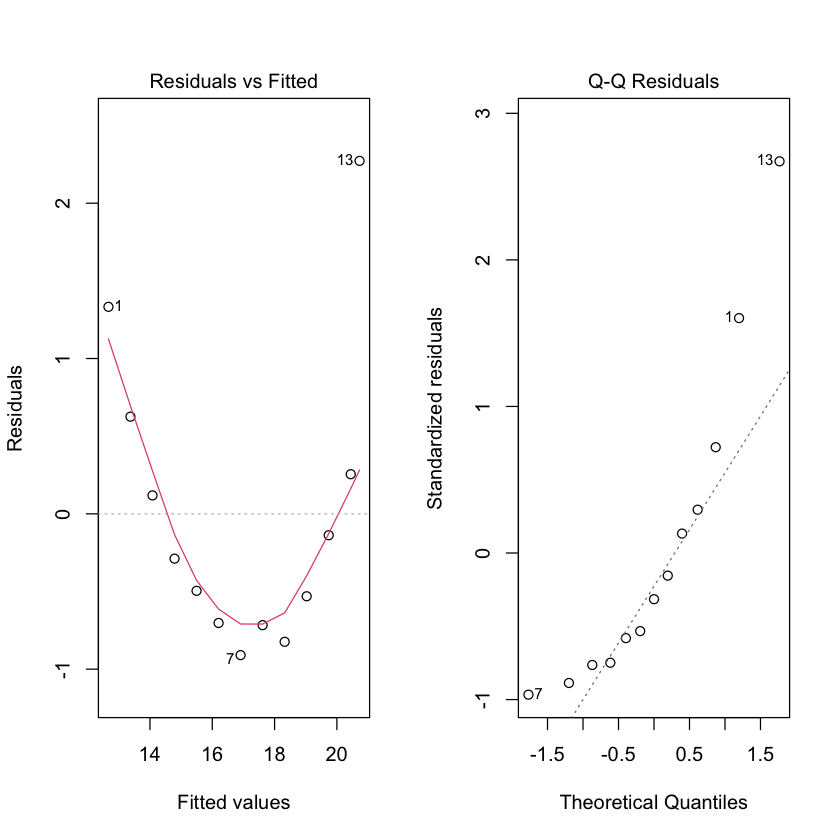

In [5]:
lmod <- lm(Rubber.Band.Length ~ weight_g, data = band1)
summary(lmod)

par(mfrow = c(1, 2))
plot(lmod, which = 1)   # Residuals vs. Fitted
plot(lmod, which = 2)   # Normal Q-Q

From the diagnostic plots, there is clear curvature in the residuals. This suggests the relationship is not simply linear.

### 4. Attempting a Quadratic Transformation

Because the original weight vs. length plot looks roughly parabolic, we consider modeling **length ~ weight²**. We create a squared-weight column and fit a new model:

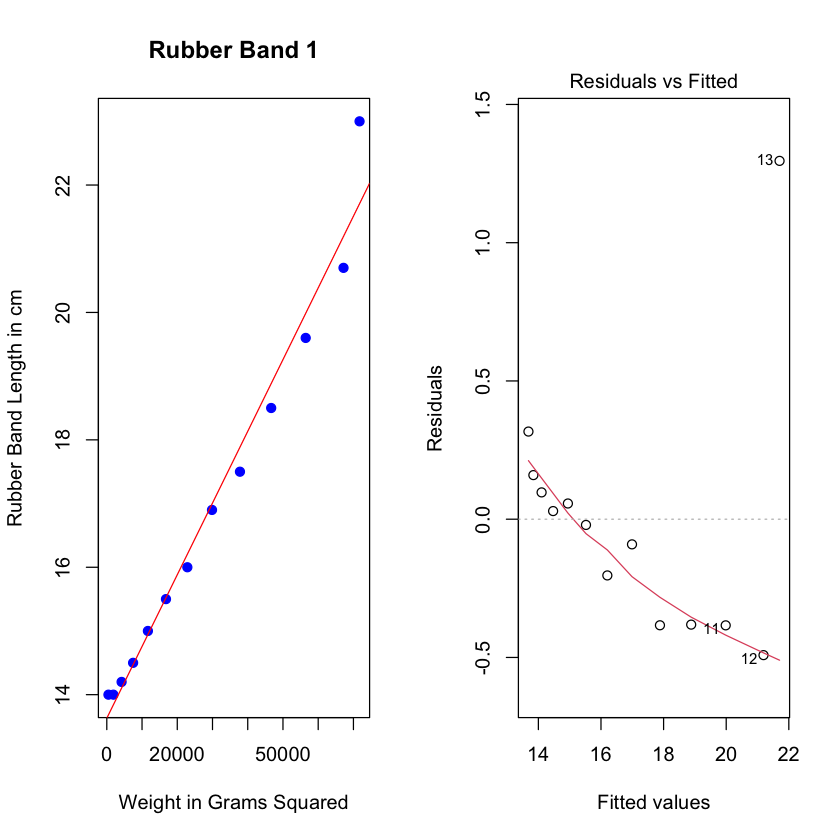

In [6]:
band1_sq <- band1
band1_sq$weight_g_sq <- band1_sq$weight_g^2

# Plot with a fitted quadratic line
par(mfrow = c(1, 2))
plot(
  band1_sq$weight_g_sq, 
  band1_sq$Rubber.Band.Length, 
  main = "Rubber Band 1", 
  xlab = "Weight in Grams Squared", 
  ylab = "Rubber Band Length in cm", 
  pch = 19, 
  col = "blue"
)
abline(lm(Rubber.Band.Length ~ weight_g_sq, data = band1_sq), col = "red")

# Fit the model
lmod_sq <- lm(Rubber.Band.Length ~ weight_g_sq, data = band1_sq)
plot(lmod_sq, which = 1)  # Residuals vs. Fitted

**Observation:** The quadratic fit removes the parabolic pattern in the residuals, although we do notice some remaining patterns at high weight values (possible outliers or high leverage points).

### 5. Prediction Interval

We produce a **90% prediction interval** for the rubber band length at the 80th percentile of measured weights. This estimates how far the band will stretch at that weight, including noise and individual measurement variability.

In [7]:
# 80th percentile of weight
weight_80 <- quantile(band1$weight_g, 0.8)

# Prediction at that weight
predict(
  lmod_sq, 
  newdata = data.frame(weight_g_sq = weight_80^2), 
  interval = "prediction", 
  level = 0.90
)

,fit,lwr,upr
80%,19.53026,18.60266,20.45785


### 6. Confidence Interval for the Slope

Next, we calculate a **95% confidence interval** for the slope coefficient in the transformed model. Because the coefficient is so small (on the order of 1e-4), we also scale it by dividing by 100,000 so that the coefficient is more interpretable:

In [8]:
summary(lmod_sq)
confint(lmod_sq, level = 0.95)

# Scale the squared-weight for more intuitive interpretation
band1_sq$weight_g_sq_scaled <- band1_sq$weight_g_sq / 100000
lmod_sq_scaled <- lm(Rubber.Band.Length ~ weight_g_sq_scaled, data = band1_sq)
summary(lmod_sq_scaled)
confint(lmod_sq_scaled, level = 0.95)


Call:
lm(formula = Rubber.Band.Length ~ weight_g_sq, data = band1_sq)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49160 -0.38126 -0.02077  0.09693  1.29593 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.363e+01  2.083e-01   65.42 1.32e-15 ***
weight_g_sq 1.125e-04  5.544e-06   20.30 4.55e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4815 on 11 degrees of freedom
Multiple R-squared:  0.974,	Adjusted R-squared:  0.9716 
F-statistic: 412.1 on 1 and 11 DF,  p-value: 4.554e-10


,2.5 %,97.5 %
(Intercept),1.317192e+01,14.089071372
weight_g_sq,1.003402e-04,0.000124744



Call:
lm(formula = Rubber.Band.Length ~ weight_g_sq_scaled, data = band1_sq)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49160 -0.38126 -0.02077  0.09693  1.29593 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         13.6305     0.2083   65.42 1.32e-15 ***
weight_g_sq_scaled  11.2542     0.5544   20.30 4.55e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4815 on 11 degrees of freedom
Multiple R-squared:  0.974,	Adjusted R-squared:  0.9716 
F-statistic: 412.1 on 1 and 11 DF,  p-value: 4.554e-10


,2.5 %,97.5 %
(Intercept),13.17192,14.08907
weight_g_sq_scaled,10.03402,12.47440


### 7. Final Quadratic Fit Visualization

Finally, we plot the **raw data** (Band 1) and overlay the **quadratic fit** curve (using the scaled model):

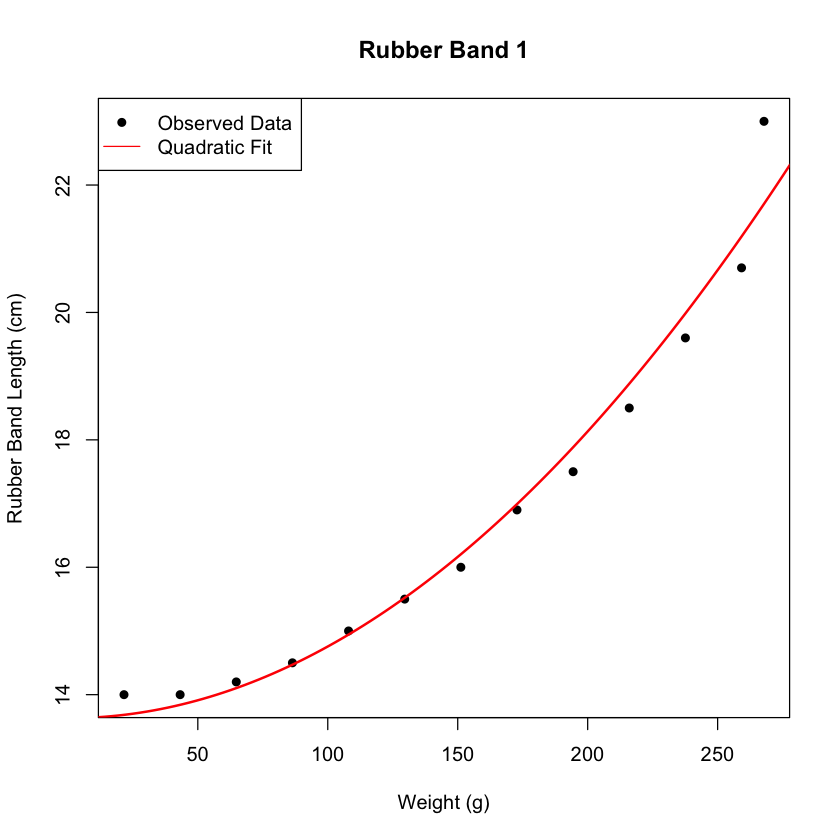

In [9]:
plot(
  band1$weight_g, 
  band1$Rubber.Band.Length, 
  xlab = "Weight (g)", 
  ylab = "Rubber Band Length (cm)",
  main = "Rubber Band 1",
  pch = 16
)

weight_seq <- seq(min(band1$weight_g) - 10, max(band1$weight_g) + 10, length.out = 100)

weight_seq_sq <- weight_seq^2 / 100000
predicted_values <- predict(
  lmod_sq_scaled, 
  newdata = data.frame(weight_g_sq_scaled = weight_seq_sq)
)

lines(weight_seq, predicted_values, col = "red", lwd = 2)

legend(
  "topleft", 
  legend = c("Observed Data", "Quadratic Fit"),
  pch = c(16, NA),
  lty = c(NA, 1),
  col = c("black", "red")
)

## Discussion & Future Considerations

1. **Model Performance:** A quadratic term helps reduce curvature in the residuals. Residual diagnostic plots still suggest outliers at higher weight values.
2. **Potential Non-Constant Variance:** While the transformation corrects curvature, we should further assess homoskedasticity. Weighted regression or other variance-stabilizing transformations might help if heteroskedasticity is confirmed.
3. **Other Transformations:** We tried $\text{weight}^2$. One could also compare fits using $\log(\text{weight})$ or polynomial expansions (weight^3) or even consider nonparametric fits, depending on domain context.
4. **Prediction vs. Confidence Intervals:** We provided both a **prediction interval** (uncertainty in future observations) and a **confidence interval** (uncertainty in the regression slope parameter). These intervals serve different interpretive purposes and highlight both the precision of the model and the variability in individual measurements.